## Paraphrase Mining

In [2]:
from sentence_transformers import SentenceTransformer, util


In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\bablu\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bablu\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
s1="The Cat is on Table"
s2="The Cat is on Tree"

emb1 = model.encode(s1)
emb2 = model.encode(s2)

simi_score = util.pytorch_cos_sim(emb1, emb2)
simi_score

tensor([[0.7418]])

In [5]:
import numpy as np
s1="The Cat is on Table"
s2="The Cat is on Tree"

emb1 = model.encode(s1)
emb2 = model.encode(s2)

simi_score = np.dot(emb1, emb2)
simi_score

np.float32(0.7418082)

In [6]:
import numpy as np
s1="Bablu is sit on chare"
s2="Bablu wear orange color hoodi"

emb1 = model.encode(s1)
emb2 = model.encode(s2)

simi_score = np.dot(emb1, emb2)
simi_score

np.float32(0.5479532)

In [8]:
sentences = ["The cat sits outside", # --0
    "A man is playing guitar",
    "I love pasta", 
    "The new movie is awesome",# --> 3
    "The cat plays in the garden", # -->4
    "A woman watches TV",
    "The new movie is so great", # ---> 6
    "Do you like pizza?", 
    "She enjoys reading books",
    "He is walking his dog",
    "The weather is nice today",
    "Let's go to the beach",
    "I need a cup of coffee",
    "They are planning a trip",
    "She cooks delicious meals",
    "I am learning to play the piano",
    "He works at a tech company",
    "This book is very interesting",
    "The sun is shining brightly",
    "It's raining outside",
    "The children are playing soccer",
    "He is fixing the car",
    "She writes beautiful poetry",
    "The flowers are blooming",
    "I enjoy hiking in the mountains",
    "He is swimming in the pool",
    "We are watching a comedy show",
    "The dog is barking loudly",
    "She is painting a landscape",
    "He likes to play video games",
    "I am studying for my exams",
    "They are building a new house",
    "The coffee shop is busy",
    "He listens to classical music",
    "She is designing a website",
    "I bought a new laptop",
    "They are baking cookies",
    "The bird sings in the morning",
    "He loves going to concerts",
    "She practices yoga every day",
    "The phone is ringing",
    "I need to finish this project",
    "The restaurant has great food",
    "He collects rare coins",
    "She enjoys watching documentaries",
    "They are exploring the city",
    "The laptop is charging",
    "He is training for a marathon",
    "I meditate every morning",
    "The bakery sells fresh bread",
    "She is learning French"]
len(sentences)

51

In [40]:

s1 = []
s2=[]
scores= []
paraphrases =paraphrase_mining(model,sentences)

for paraphrase in paraphrases[:20]:
    score, i, j = paraphrase
    
    scores.append(score)
    s1.append(sentences[i])
    s2.append(sentences[j])

    print(
        "{}\t\t{}\t\t score:{:.4f}"
        .format(sentences[i], sentences[j], score)
    )




The new movie is awesome		The new movie is so great		 score:0.8939
The cat sits outside		The cat plays in the garden		 score:0.6788
She enjoys reading books		She enjoys watching documentaries		 score:0.6314
They are planning a trip		They are exploring the city		 score:0.5844
He listens to classical music		He loves going to concerts		 score:0.5794
I need a cup of coffee		The coffee shop is busy		 score:0.5284
He likes to play video games		He loves going to concerts		 score:0.5189
I bought a new laptop		The laptop is charging		 score:0.5188
I love pasta		Do you like pizza?		 score:0.5096
She enjoys reading books		She is learning French		 score:0.5038
She cooks delicious meals		The restaurant has great food		 score:0.5014
He likes to play video games		He listens to classical music		 score:0.4832
I am learning to play the piano		I am studying for my exams		 score:0.4814
She writes beautiful poetry		She is painting a landscape		 score:0.4789
The weather is nice today		The sun is shining bri

In [15]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
df = pd.DataFrame({"s1":s1, "s2":s2, "Score":scores})
df


,s1,s2,Score
0,The new movie is awesome,The new movie is so great,0.893904
1,The cat sits outside,The cat plays in the garden,0.678789
2,She enjoys reading books,She enjoys watching documentaries,0.631382
3,They are planning a trip,They are exploring the city,0.584396
4,He listens to classical music,He loves going to concerts,0.579431
5,I need a cup of coffee,The coffee shop is busy,0.528428
6,He likes to play video games,He loves going to concerts,0.518864
7,I bought a new laptop,The laptop is charging,0.518795
8,I love pasta,Do you like pizza?,0.509550
9,She enjoys reading books,She is learning French,0.503848


In [44]:
corpus1 = [
    "A man is sitting on a bench",
    "A person is seated on a park bench",
    "A dog is playing with a ball",
    "A puppy is running after a toy",
    "Two cats are fighting in the garden",
    "A pair of cats are playing outside",
    "A car is parked on the road",
    "An automobile is standing on the street",
    "A child is reading a book",
    "A kid is studying from a textbook"
]


corpus_emb = model.encode(corpus1)

In [48]:
corpus_emb = model.encode(corpus1)

# Compute cosine similarity matrix
cosine_sim_matrix = util.cos_sim(corpus_emb, corpus_emb)

# Average similarity
avg_sim = cosine_sim_matrix.mean()

avg_sim

tensor(0.1916)

In [50]:
len(cosine_sim_matrix)

10

<Axes: >

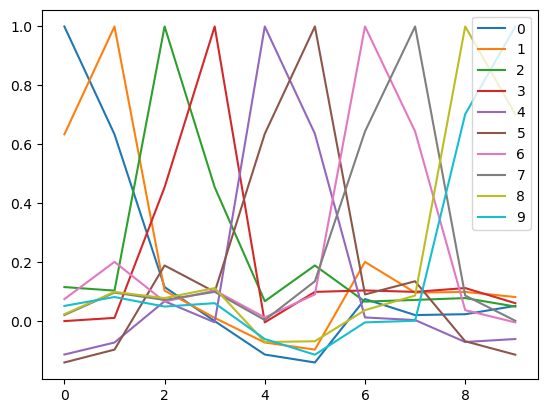

In [54]:
df_sim = pd.DataFrame(cosine_sim_matrix)

df_sim.plot()

<Axes: >

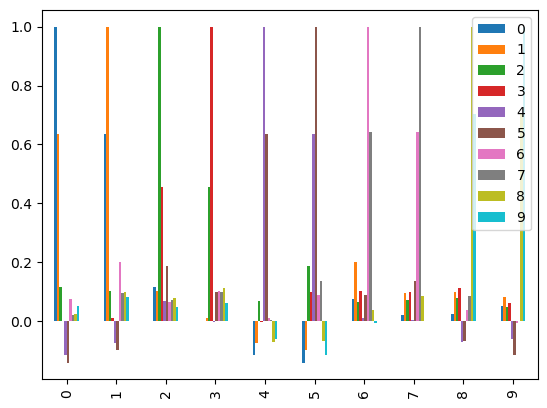

In [58]:
df_sim = pd.DataFrame(cosine_sim_matrix)

df_sim.plot(kind='bar')

In [51]:
cosine_sim_matrix

tensor([[ 1.0000e+00,  6.3404e-01,  1.1582e-01,  3.9097e-04, -1.1310e-01,
         -1.4005e-01,  7.5087e-02,  2.0860e-02,  2.3749e-02,  5.1907e-02],
        [ 6.3404e-01,  1.0000e+00,  1.0374e-01,  1.1253e-02, -7.2334e-02,
         -9.6402e-02,  2.0117e-01,  9.7038e-02,  9.9387e-02,  8.2050e-02],
        [ 1.1582e-01,  1.0374e-01,  1.0000e+00,  4.5464e-01,  6.7756e-02,
          1.8910e-01,  6.6490e-02,  7.2229e-02,  7.8467e-02,  4.9680e-02],
        [ 3.9097e-04,  1.1253e-02,  4.5464e-01,  1.0000e+00, -3.8406e-03,
          9.9417e-02,  1.0439e-01,  9.9517e-02,  1.1249e-01,  6.1205e-02],
        [-1.1310e-01, -7.2334e-02,  6.7756e-02, -3.8406e-03,  1.0000e+00,
          6.3599e-01,  1.2698e-02,  3.9090e-03, -7.0566e-02, -6.0418e-02],
        [-1.4005e-01, -9.6402e-02,  1.8910e-01,  9.9417e-02,  6.3599e-01,
          1.0000e+00,  9.0887e-02,  1.3552e-01, -6.8108e-02, -1.1369e-01],
        [ 7.5087e-02,  2.0117e-01,  6.6490e-02,  1.0439e-01,  1.2698e-02,
          9.0887e-02,  1.0000e+0